# Inequalities of Marseille a long the metro M2

In [3]:
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
from datetime import datetime

import glob
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import json
import matplotlib.pyplot as plt

InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 200
#matplotlib.rcParams['svg.fonttype'] = 'none'

In [12]:
#iris selction
iris_csv = 'iris_selection.csv'

iris_selection = pd.read_csv(iris_csv, header=0, names=['ligne', 'code_iris', 'lib_iris'])

In [23]:
iris_selection['code_iris'] = iris_selection['code_iris'].astype('str')

In [28]:
iris_selection['code_iris'].nunique()

50

## Revenus

Data from: https://www.insee.fr/fr/statistiques/3288151, from December 2014

In [9]:
#file path
revenu_file = 'data/BASE_TD_FILO_DEC_IRIS_2014.xls'

revenu = pd.read_excel(revenu_file, skiprows=5)

In [25]:
revenu['IRIS'] = revenu['IRIS'].astype('str')

In [34]:
revenu_m2 = iris_selection.merge(revenu, left_on='code_iris', right_on='IRIS')

In [36]:
revenu_m2.head()

,ligne,code_iris,lib_iris,IRIS,LIBIRIS,COM,LIBCOM,DEC_PIMP14,DEC_TP6014,DEC_Q114,...,DEC_D914,DEC_RD14,DEC_S80S2014,DEC_GI14,DEC_PTSA14,DEC_PCHO14,DEC_PBEN14,DEC_PPEN14,DEC_PAUT14,note
0,Bougainville,132150501,Zoccolat,132150501,Zoccolat,13215,Marseille 15e Arrondissement,13.441483,83.960059,1738.0,...,15030.0,NaN,1421.814867,0.502808,55.3,11.8,0.5,30.6,1.8,0
1,Bougainville,132140302,Casanova,132140302,Casanova,13214,Marseille 14e Arrondissement,27.017115,70.221704,870.0,...,20968.0,NaN,2267.168856,0.544484,55.1,6.3,1.6,34.8,2.2,0
2,National,132030304,Briancon,132030304,Briancon,13203,Marseille 3e Arrondissement,NaN,79.588993,2488.0,...,15916.0,NaN,140.373675,0.482422,NaN,NaN,NaN,NaN,NaN,0
3,National,132030306,Bellevue-Pyat,132030306,Bellevue-Pyat,13203,Marseille 3e Arrondissement,NaN,NaN,212.0,...,13504.0,NaN,NaN,0.534798,NaN,NaN,NaN,NaN,NaN,0
4,National,132030403,Fonscolombes,132030403,Fonscolombes,13203,Marseille 3e Arrondissement,21.021611,74.336283,2723.0,...,19686.0,NaN,99.594715,0.511922,61.8,8.7,3.0,25.5,1.0,0


In [40]:
revenu_m2_median = revenu_m2.groupby(['ligne'], sort=False).DEC_MED14.mean()

In [41]:
revenu_m2_median

ligne
Bougainville                          5879.000000
National                              6103.333333
Désirée Clary                         8318.000000
Joliette                             12854.250000
Jules Guesde                          7238.800000
Saint-Charles                         9848.000000
Noailles                              8763.500000
Notre-Dame-du-Mont - Cours Julien    18334.666667
Castellane                           20032.000000
Périer                               27578.800000
Rond-point du Prado                  24451.500000
Sainte-Marguerite Dromel             18033.000000
Name: DEC_MED14, dtype: float64

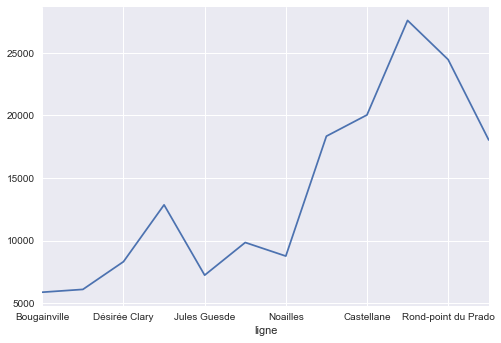

In [42]:
revenu_m2_median.plot(kind='line')

## Population

Newest version I found so far: https://www.insee.fr/fr/statistiques/2386737

In [43]:
#file path
population_file = 'data/base-ic-evol-struct-pop-2013.xls'

population = pd.read_excel(population_file, skiprows=5)

In [45]:
population['IRIS'] = population['IRIS'].astype('str')

In [46]:
population_m2 = iris_selection.merge(population, left_on='code_iris', right_on='IRIS')

In [48]:
population_m2.head()

,ligne,code_iris,lib_iris,IRIS,REG,REG2016,DEP,UU2010,COM,LIBCOM,...,C13_F15P_CS4,C13_F15P_CS5,C13_F15P_CS6,C13_F15P_CS7,C13_F15P_CS8,P13_POP_FR,P13_POP_ETR,P13_POP_IMM,P13_PMEN,P13_PHORMEN
0,Bougainville,132150501,Zoccolat,132150501,93,93,13,00759,13215,Marseille 15e Arrondissement,...,23.994053,147.361614,45.402013,64.991781,637.669842,2192.122047,773.144619,763.636369,2819.267289,145.999377
1,Bougainville,132140302,Casanova,132140302,93,93,13,00759,13214,Marseille 14e Arrondissement,...,48.905068,139.170441,33.237124,227.407807,321.148090,1651.147440,300.817321,406.053010,1919.964845,31.999916
2,National,132030304,Briancon,132030304,93,93,13,00759,13203,Marseille 3e Arrondissement,...,11.871886,147.077728,3.548990,79.771603,250.011373,1073.327766,298.924237,429.929506,1372.252003,0.000000
3,National,132030305,Bellevue Caravelle,132030305,93,93,13,00759,13203,Marseille 3e Arrondissement,...,26.532188,109.124562,29.747276,33.706547,290.913835,1072.404399,377.575131,387.722059,1449.979530,0.000000
4,National,132030306,Bellevue-Pyat,132030306,93,93,13,00759,13203,Marseille 3e Arrondissement,...,0.000000,51.400881,16.531057,53.741254,250.611704,793.624920,252.051419,379.315973,1045.676339,0.000000


In [49]:
population_m2_pop_total = population_m2.groupby(['ligne'], sort=False).P13_POP.mean()

In [50]:
population_m2_pop_total

ligne
Bougainville                         2458.615713
National                             1653.750794
Désirée Clary                        2506.727441
Joliette                             1865.578734
Jules Guesde                         1923.233311
Saint-Charles                        1805.797303
Noailles                             2309.930665
Notre-Dame-du-Mont - Cours Julien    2363.539672
Castellane                           2257.848021
Périer                               2288.328722
Rond-point du Prado                  2433.966870
Sainte-Marguerite Dromel             2421.443476
Name: P13_POP, dtype: float64

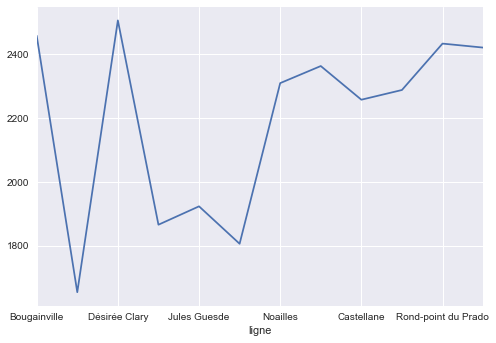

In [51]:
population_m2_pop_total.plot(kind='line')

In [52]:
# nombre d'hommes

population_m2_pop_homme = population_m2.groupby(['ligne'], sort=False).P13_POPH.mean()

In [53]:
population_m2_pop_homme

ligne
Bougainville                         1289.350916
National                              809.106177
Désirée Clary                        1196.842312
Joliette                              952.237601
Jules Guesde                         1020.383073
Saint-Charles                         962.392376
Noailles                             1216.992479
Notre-Dame-du-Mont - Cours Julien    1109.132979
Castellane                           1016.644083
Périer                               1038.348120
Rond-point du Prado                  1112.331540
Sainte-Marguerite Dromel             1120.221055
Name: P13_POPH, dtype: float64

In [54]:
# nombre d'immigrés / "Migrationshintergrund"

population_m2_pop_imm = population_m2.groupby(['ligne'], sort=False).P13_POP_IMM.mean()

In [55]:
population_m2_pop_imm

ligne
Bougainville                         584.844690
National                             527.337888
Désirée Clary                        687.078237
Joliette                             396.811619
Jules Guesde                         622.713561
Saint-Charles                        615.856911
Noailles                             733.040546
Notre-Dame-du-Mont - Cours Julien    308.642139
Castellane                           262.637291
Périer                               252.161051
Rond-point du Prado                  258.153367
Sainte-Marguerite Dromel             294.282790
Name: P13_POP_IMM, dtype: float64

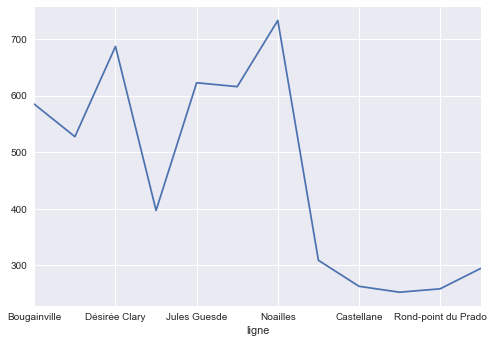

In [56]:
population_m2_pop_imm.plot(kind='line')

In [57]:
# nombre de français

population_m2_pop_fr = population_m2.groupby(['ligne'], sort=False).P13_POP_FR.mean()

In [58]:
population_m2_pop_fr

ligne
Bougainville                         1921.634744
National                             1279.659870
Désirée Clary                        1971.946167
Joliette                             1581.016469
Jules Guesde                         1465.736272
Saint-Charles                        1318.103398
Noailles                             1774.655756
Notre-Dame-du-Mont - Cours Julien    2149.721018
Castellane                           2081.491530
Périer                               2129.597694
Rond-point du Prado                  2299.903221
Sainte-Marguerite Dromel             2272.466447
Name: P13_POP_FR, dtype: float64

In [59]:
# nombre d'étrangers

population_m2_pop_etr = population_m2.groupby(['ligne'], sort=False).P13_POP_ETR.mean()

In [60]:
population_m2_pop_etr

ligne
Bougainville                         536.980970
National                             374.090924
Désirée Clary                        534.781274
Joliette                             284.562265
Jules Guesde                         457.497039
Saint-Charles                        487.693905
Noailles                             535.274909
Notre-Dame-du-Mont - Cours Julien    213.818654
Castellane                           176.356491
Périer                               158.731027
Rond-point du Prado                  134.063649
Sainte-Marguerite Dromel             148.977029
Name: P13_POP_ETR, dtype: float64